In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (5)\IMDB-Dataset.csv",encoding='latin-1')

In [95]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords=["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'they', 'only', "weren't", "it's", 'our', 'was', 'after', 'wasn', 'him', 'down', 'now', 'no', "won't", 'there', 'm', 'these', 'until', 'themselves', 'weren', 'all', 'into', 'during', 'both', 'that', 'who', "mustn't", 'mustn', "wasn't", 'might', 'my', 'for', 'can', "didn't", 'been', 'would', 'ma', 'wouldn', 've', 'me', "hadn't", 'will', 'from', 'while', 'same', "mightn't", 'haven', 'them', "hasn't", 'having', "haven't", 'won', 'each', 'between', "you'd", 'himself', 'are', 'you', 'didn', 's', 'his', 'y', "you're", 'as', 'what', 'under', 'being', 'such', 'in', 'had', 'is', 'could', 'to', 'your', 'd', 'ours', 'through', 'further', 'so', "should've", 'needn', 'o', 'he', 'once', 'itself', 'couldn', 'mightn', 'yourself', 'shall', "you'll", 'out', 'do', 'if', 'over', 't', 'she', 'were', 'own', 'isn', 'has', 'too', 'theirs', 'yours', 'hasn', 'other', "she's", 'when', "shan't", 'yourselves', 'i', 'll', 'at', "don't", 'a', 'before', 'again', 'doing', 'did', 'because', 'but', 'why', 'few', 'hadn'

In [96]:
def remove_special_character(content):
    return re.sub('\[[^&@#!]]*\]',' ',content)
def remove_url(content):
    return re.sub(r'http\S+','',content)

def remove_stopwords(content):
    clean_data=[]
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t","would not",content)
    content = re.sub(r"can\'t","can not",content)
    content = re.sub(r"don\'t","do not",content)
    content = re.sub(r"shouldn\'t","should not",content)
    content = re.sub(r"needn\'t","need not",content)
    content = re.sub(r"hasn\'t","has not",content)
    content = re.sub(r"haven\'t","have not",content)
    content = re.sub(r"weren\'t","were not",content)
    content = re.sub(r"mightn\'t","might not",content)
    content = re.sub(r"didn\'t","did not",content)
    content = re.sub(r"n\'t","not",content)
    ontent = re.sub(r"\'itis"," it is",content)
    
    
    content = re.sub(r"\'re"," are",content)
    content = re.sub(r"\'s"," is",content)
    content = re.sub(r"\'d"," would",content)
    content = re.sub(r"\'ll"," will",content)
    content = re.sub(r"\'t"," not",content)
    content = re.sub(r"\'ve"," have",content)
    content = re.sub(r"\'m"," am",content)
    return content

def data_cleaning(content):
    content = remove_special_character(content)
    content = remove_url(content)
    content = contraction_expansion(content)
    content = remove_stopwords(content)
    return content

In [97]:
pd.options.display.max_colwidth =1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",watched movie conditional see films wouldnot caught dead giving hard earned money explain depth write shortest donot see far unbelievably unfunny movie ever total since hatred others like extends far beyond one think go not know people movie besides carmen vanessa kim doesnot though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come someone gets minor facial next someone gets cut blood least cut since narnia films away give disaster movie pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,"Estou escrevendo

In [98]:
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [99]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [103]:
df['Reviews_clean'].describe()

count     150000
unique    149746
top        story
freq          10
Name: Reviews_clean, dtype: object

In [104]:
print('Unique reviews:%s' %df.Reviews_clean.nunique())
print('Unique movie names: %s'%df.Movies.nunique())
print('No of ratings: %s' %df.Ratings.count())

Unique reviews:149746
Unique movie names: 14206
No of ratings: 150000


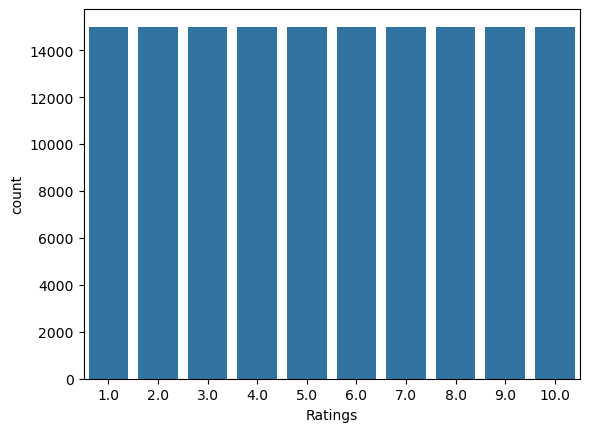

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [37]:
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

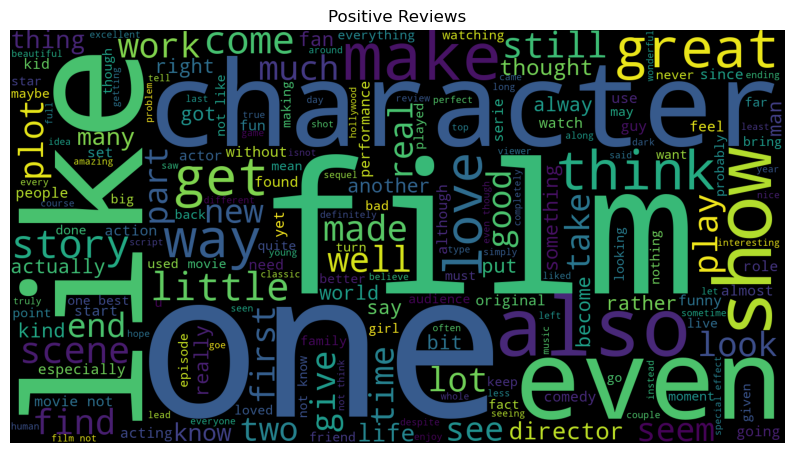

In [105]:
sentences = df['Reviews_clean']
pos =' '.join(map(str,sentences[df['Ratings']>=7]))
neg =' '.join(map(str,sentences[df['Ratings']<=4]))
pos_wordcloud = WordCloud(width=1500,height=800, background_color='black',stopwords=stop_words,min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

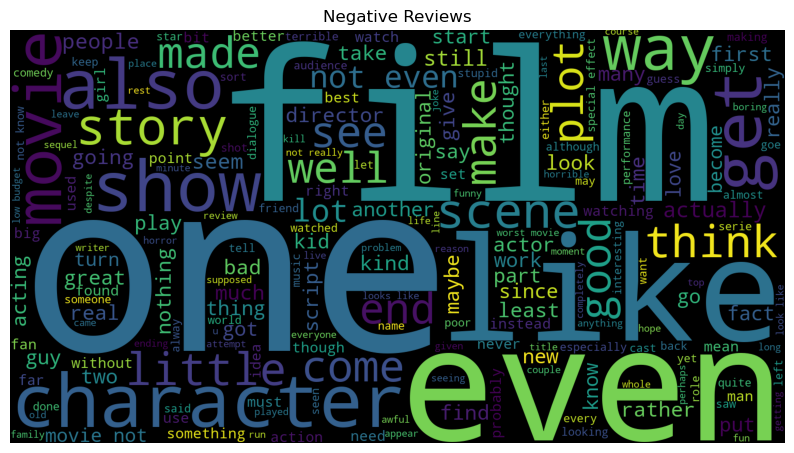

In [106]:
neg_wordcloud = WordCloud(width=1500,height=800,background_color ='black',stopwords=stop_words,min_font_size=15).generate(neg)
plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

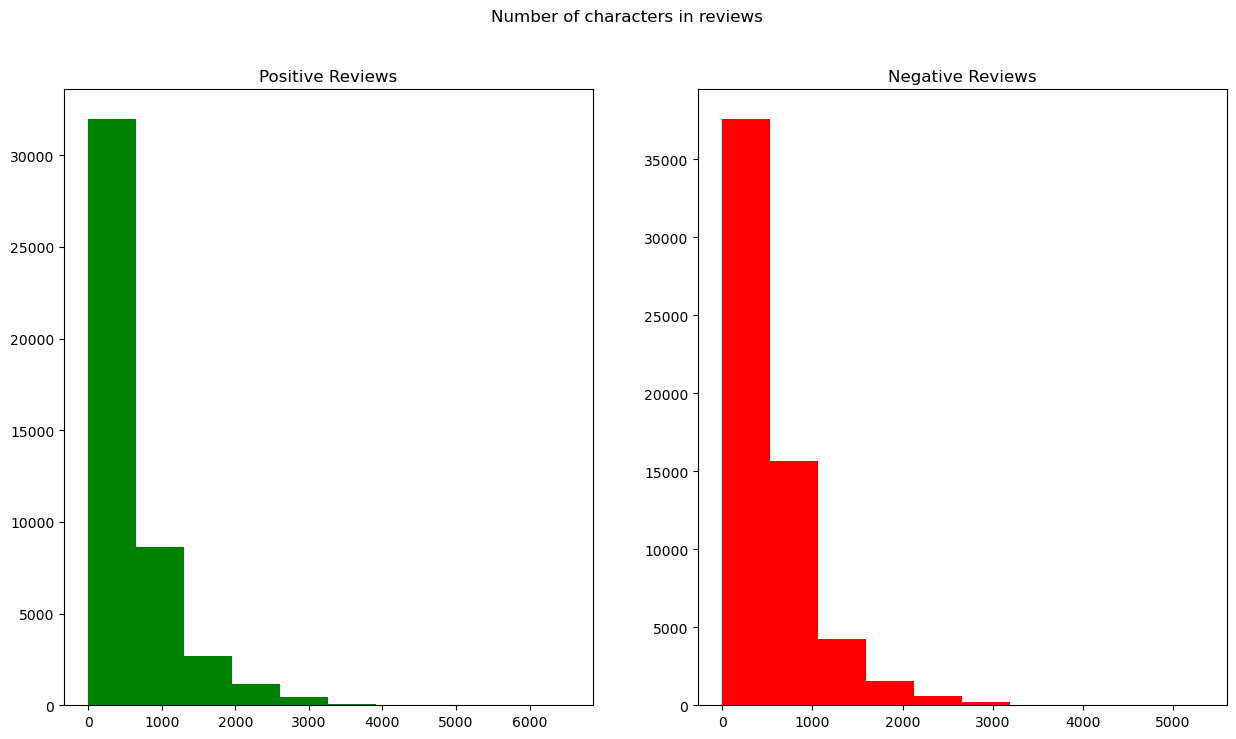

In [107]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of characters in reviews')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

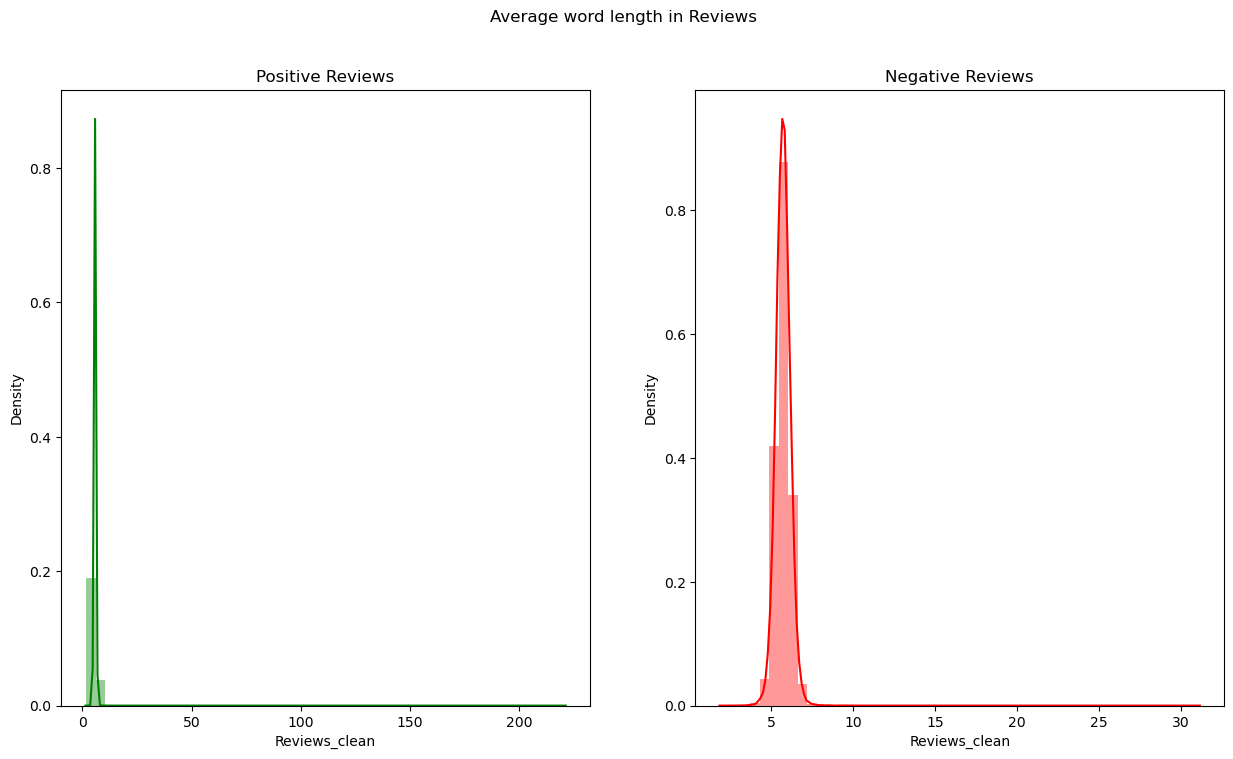

In [108]:
# average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x:np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x:np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [109]:
# importnat feature using count vectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

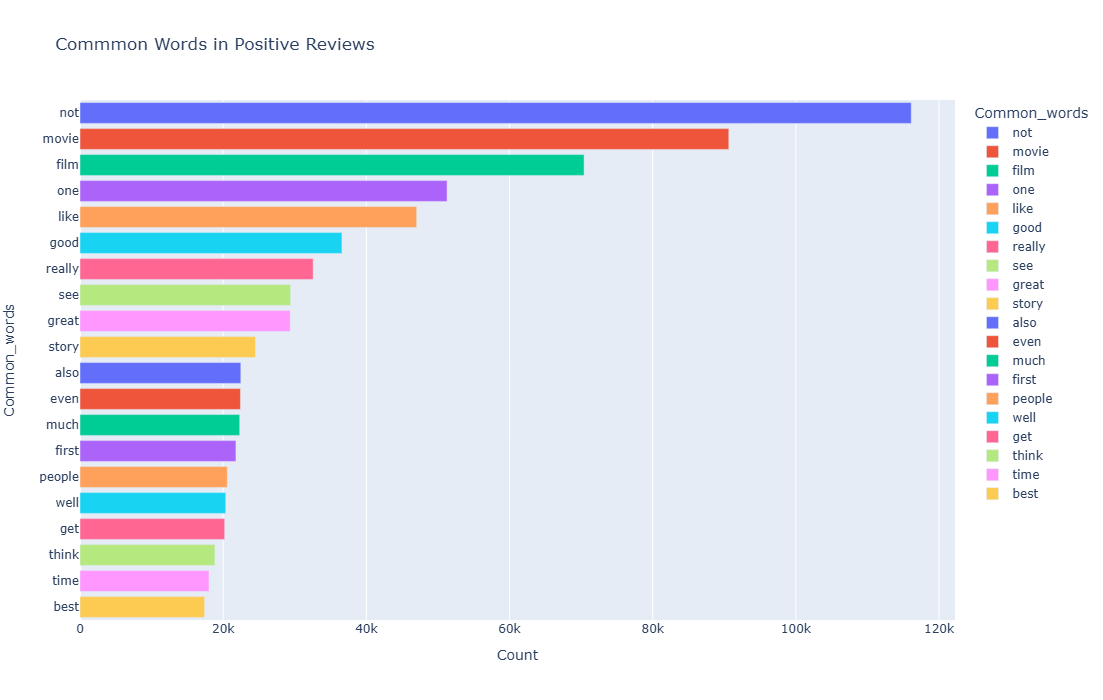

In [111]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

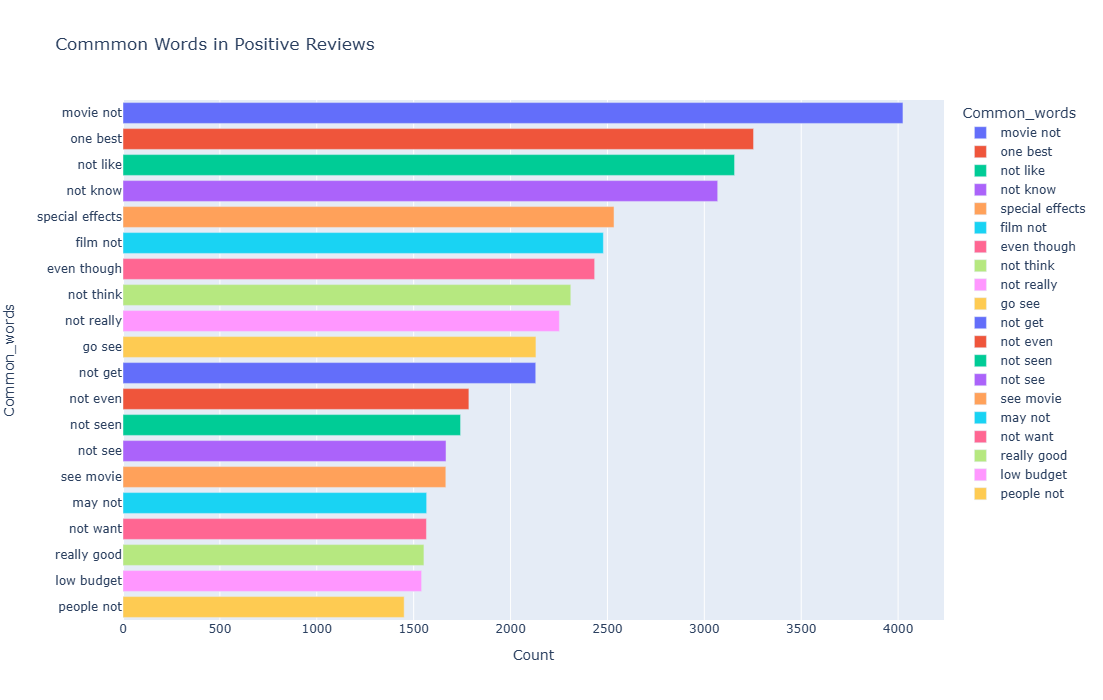

In [110]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

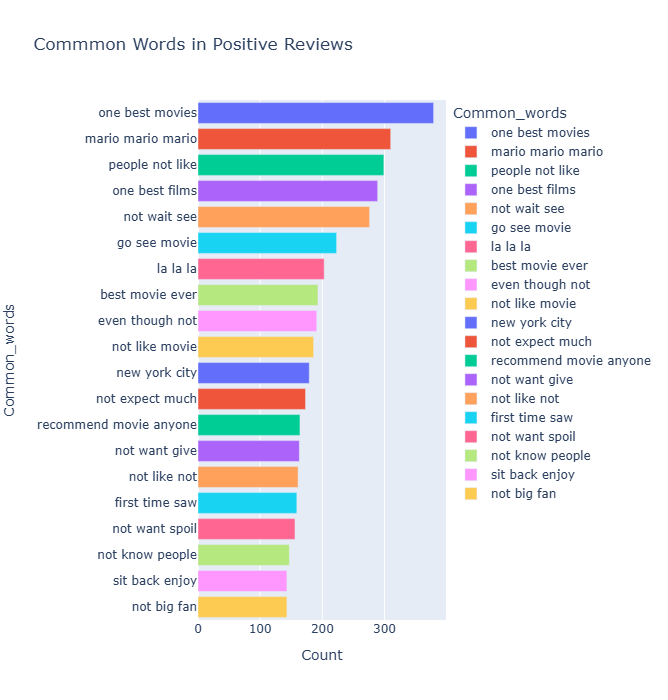

In [120]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [114]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies","Reviews_clean"]][(df['Ratings']>=7)&(df['Reviews_clean'].str.contains("not like| itis | not want| not big fan"))].head(30)

,Reviews,Ratings,Movies,Reviews_clean
90015,To be honest I didn't watch this movie initially because of bad reviews by most of the professional reviewers. But yesterday I got its DVD and thought why not watch it at least for 15 minutes. And I was really surprised. I enjoyed the fist 15 minutes and decided to watch the entire movie and to be honest I had a blast. It is not a bad movie as other reviews suggest. I don't know why those reviewers didn't like the movie. Anyhow lets talk about story. The story is fine and screenplay is good. The dialogues and situations are okay. I laughed at almost every gag. Saif in the role of mental guy was superb. He stole the show with that character. Ram kapoor in all 3 roles was good. I felt Ritesh didn't get those excellent lines to deliver that he got in movies like Masti and Dhamaal. The 3 girls have small roles and have nothing much to do. I wonder what made a serious actor like Bipasha do this type of movie. Anyhow I feel Sajid Khan did a good job. And people should watch this movie th...,7.0,Humshakals,honest not watch movie initially bad reviews professional yesterday got dvd thought not watch least really enjoyed fist minutes decided watch entire movie honest not bad movie reviews not know reviewers not like anyhow lets talk story fine screenplay dialogues situations laughed almost every saif role mental guy stole show ram kapoor roles felt ritesh not get excellent lines deliver got movies like masti girls small roles nothing much wonder made serious actor like bipasha type anyhow feel sajid khan good people watch movie reviewers not taste like humshakals better story gags compared sajid previous enjoy good
90041,"Stars : Bill Oberst,Jr. and Rich Goteri. Written & Directed by : Jason Hull. Have to digress abit,In the '90s critiqued a video ( VHS ) ELVES which starred Dan Haggerty as Santa vs Nazi Xmas Elves.Watched it every Christmas after till tape broke,KRAMPUS has given us a new viewing tradition for next annual ritual . So, We don't want to do spoilers and such, But,Santa is in Krampus along with the demon himself. Actually well told script has a cop who was on Naughty List and grew out of it. Lots of violence and cool deaths,Is that a oxymoron statement ? Winter equals snow and locale adds lots to look of film. This has all the makings of a cult film,Would build a better poster and maybe push the great soundtrack.",7.0,Krampus: The Christmas Devil,stars bill rich written directed jason digress critiqued video vhs elves starred dan haggerty santa vs nazi xmas every christmas till tape given us new viewing tradition next annual ritual not want spoilers krampus along demon actually well told script cop naughty list grew lots violence cool oxymoron statement winter equals snow locale adds lots look makings cult build better poster maybe push great
90058,"Rapsittie Street Kids: Believe in Santa is definitely a hard sell. The animation is bogus, the music is weird, and the story is at times incoherent. On the other hand, taken as a whole, the plot is charming, the characters are fun (and well acted!) and the strange animation works to create a fascinating world. The resounding message of the film can be found in its title: Believe in Santa. While not exactly profound, if you approach it from the perspective of the experience of Christmas, and of being in this uniquely comforting CGI realm, then Rapsittie Street Kids can be understood primarily as a feeling more than anything else. If anything, it's like a dream about Christmas. It's a hard movie to say anything about, largely because going into the details seems a bit like missing the point. What are you supposed to say? The grandmother talks funny? The bullies are rude? The toilet in the junkyard is cool? There's no point in breaking the movie down, because you either enjoy it as a ...",7.0,Rapsittie Street Kids: Believe in Santa,rapsittie street believe santa definitely hard animation music story times taken plot characters fun well 

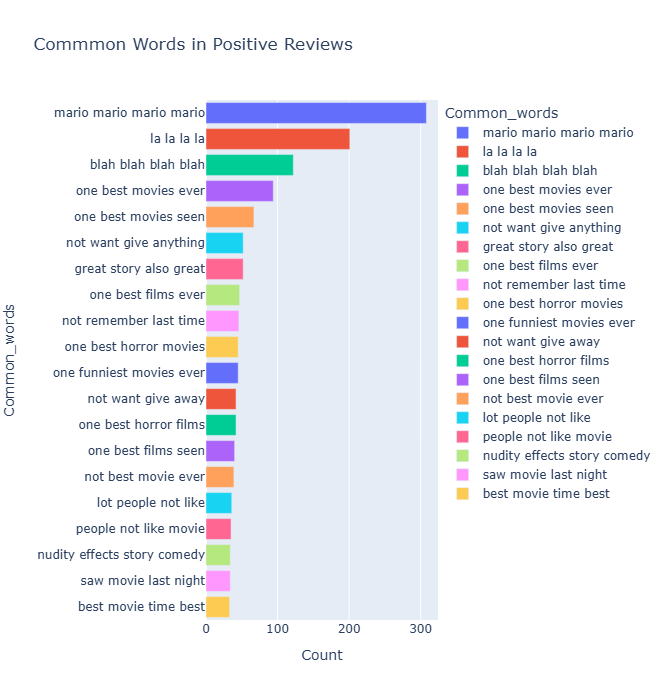

In [121]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

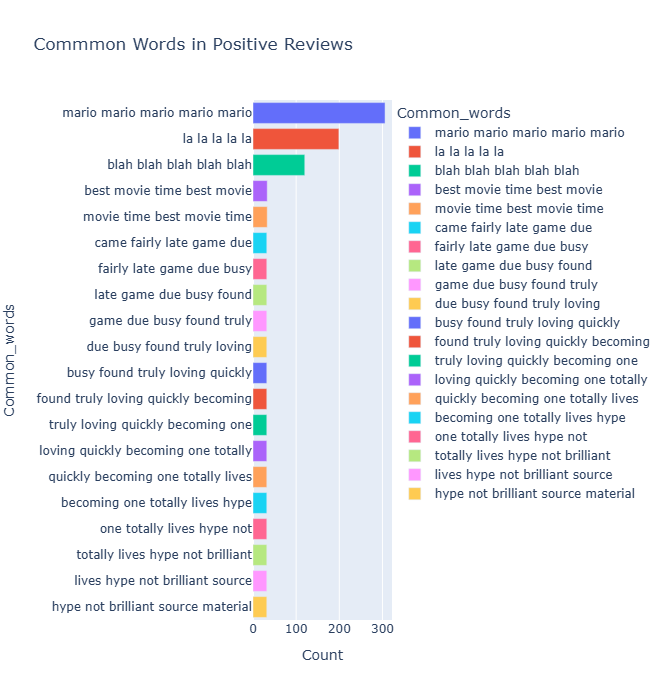

In [122]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [117]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies","Reviews_clean"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("blah blah blah| la la la la| mario mario mario mario"))].head(30)

,Reviews,Ratings,Movies,Reviews_clean
571,"Well I wasn't sure what language this film was made in - so I put it through Babel Fish. Here is a typical line translated:'Blah blah blah..blah blah blah blah, blah de blah'.This actually makes more sense than the lines the actors were uttering.Effects wise I spotted left over props from Voyage to the bottom of the Sea (Think Giant squids and Fish Men)Best line (from a cigar smoking middle aged Man to a 9 year old) 'This World's become a place where boys like you and me have to grow up fast' (he looks at least 50 for God's sake)This film makes a previous SyFy effort (Savage planet - about alien killer bears) look like a masterpiece.Great going guys :)",1.0,War of the Worlds 2: The Next Wave,well wasnot sure language film made put babel typical line blah blah blah blah de actually makes sense lines actors wise spotted left props voyage bottom sea giant squids fish line cigar smoking middle aged man year world become place boys like grow looks least god film makes previous syfy effort planet alien killer look like going guys
1070,"No, it doesn't. This is the WORST show. If you can even call it that, on the internet. Don't worry, I am not that kind of guy who bashes on kids for making videos, usually they're actually as good as work done by adults, just maybe the voices are different. But not here. Once you watch just one of his videos you immediately hate Lucas, the infamous maker of ""Fred"", and plays as him. You don't care about his personal life or ANYTHING, all you want and need to do is tell him off. He got MOST subscribed on You Tube for months on end, and he does NOT deserve that badge. I wouldn't mind if he were an O.K actor but, he just... let me explain. A Fred video in a nutshell... ""Blah blah blah blah blah O.M.G Judy ha i am so not funny blah blah blah pointless yelling wow look Kevin blah blah blah mom comes home and says something unfunny, blah blah blah, subscribe. To the person who just wasted your time and gave you partial deafness in your ears."" All that and some high pitching easily done i...",1.0,Fred,worst even call donot not kind guy bashes kids making usually actually good work done maybe voices not watch one videos immediately hate infamous maker plays not care personal life want need tell got subscribed tube months not deserve wouldnot mind actor let fred video blah blah blah blah judy ha not funny blah blah blah pointless yelling wow look kevin blah blah blah mom comes home says something blah blah person wasted time gave partial deafness high pitching easily done audacity original audio replaced worst videos clear effort thinks daily situations one really cares acts annoying stupid high pitched guarantee regret watching nobody ever met likes
4538,"Forget Manos, this is without a doubt the worst movie EVER MADE! The incredibly dull monster, bad dubbing, bad acting, annoying narration and lack of narration during parts where you need it, the stupid couples who never learned how to run, the idiot military who cant figure out how to shoot a gun, the unexplained sub plots,no Torgo, EVERYTHING IS WRONG IN THIS MOVIE!! Even watching it on MST3K is nearly impossible, but if you are going to watch it, use Mike and the bots!!The movie starts with stock footage of a space shuttle lifting playing backwards. A couple and a cop decide to investigate, blah blah blah monster eats people, blah blah blah monster explodes. AVOID THIS FILM BY ANY MEANS NECESSARY!",1.0,The Creeping Terror,forget without doubt worst movie ever incredibly dull bad bad annoying narration lack narration parts need stupid couples never learned idiot military cant figure shoot unexplained sub everything wrong even watching nearly going watch use mike movie starts stock footage space shuttle lifting playing couple cop decide blah blah blah monster eats blah blah blah monster avoid film means
7699,"Hmmmm OK lets start off with the GOOD of this movie....The female actresses...NOT their acting Ann Hens

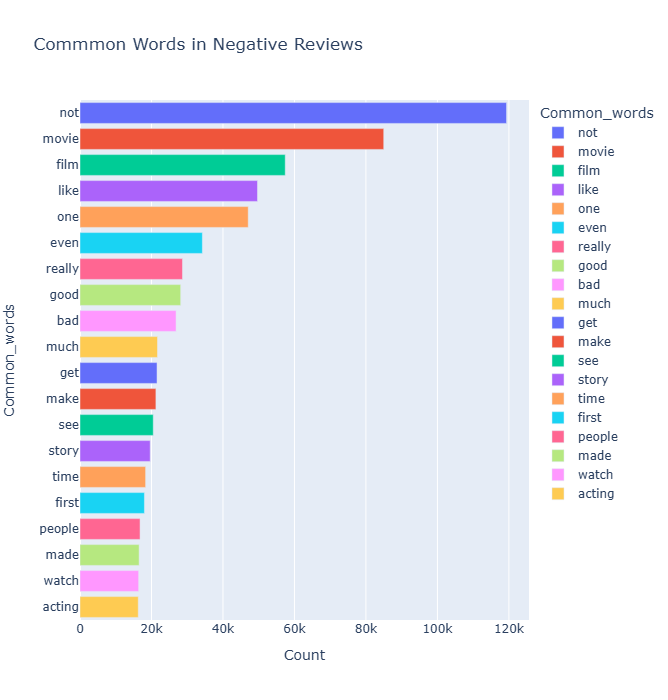

In [126]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

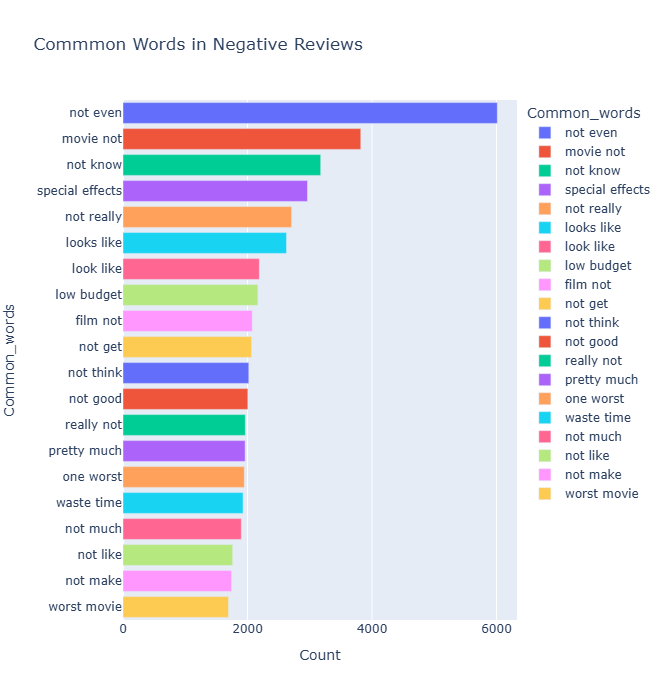

In [127]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

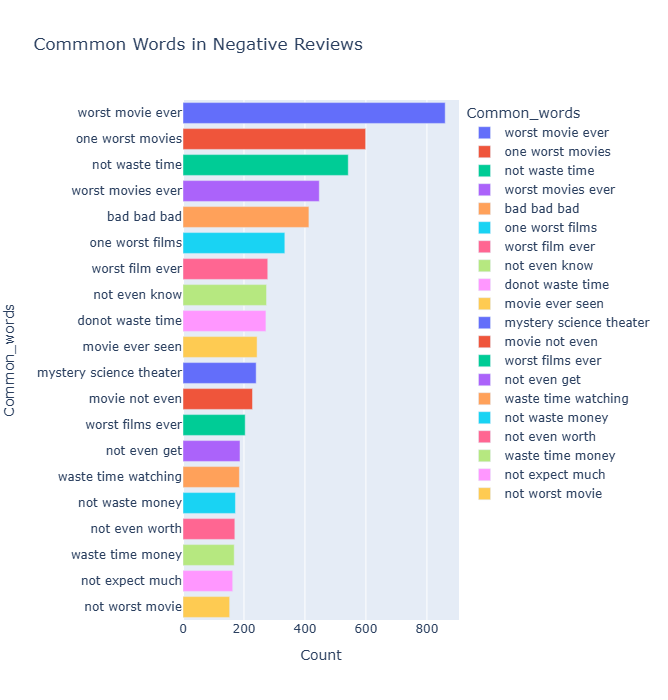

In [128]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [129]:
pd.options.display.max_colwidth =1000
df[["Reviews","Ratings","Movies","Reviews_clean"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies,Reviews_clean
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1.0,Disaster Movie,saw previous spoof movies two horrible know already tell want watch brainless person meant stereotypical laugh judge even movie automatically never ask comes two good old hollywood days whenever making movie showing people type also story kept edge well whenever word hit making films earned loads greedy people came picture quite two still movie artists notably genius christopher two guys writing big let put simple terms guys not instead money craving latest movie proves even movie fails easily mind mean nothing funny people usually put best stuff idiots knew going made bet wasnot good idea write movie reviews paper tell everyone whats good whats flipped review well warning not even called nothing artistic references made throughout pretty much like hannah montana juno gig actually close spoofing failed referencing instead joking twisting random wrestling not know high respect high respect know not something movie doesnot add story nudity not really needed closest still gotten idea ...
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but ""Disaster Movie"" may just...",1.0,Disaster Movie,given free ticket not complain ripped minutes life irretrievably stolen sort movies epic meet not funny time reached new wasnot one real laugh anywhere alleged actually considerable amount stuff form especially garbage along ample helpings juvenile none actors even bothering put pretense nothing even mildly intelligent going entire film beginning end utterly humorless human know past sort trash made enough money keep seltzer et grinding may downfall utter contempt seltzer collaborators audience finally beginning show one fails saw almost empty theater good chance seltzer go back drawing stop making lazy finally develop real sense movie unfunny piece puke stay away
7,"OK, so ""Disastrous"" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he ""pissed his pants"" at the trailer had free passes. I think he's 

In [130]:
# Feature engineering

In [131]:
df['Label'] = df['Ratings'].apply(lambda x:'1' if x>=7 else('0' if x<=4 else '2'))
df=df[df.Label<'2']
data = df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [134]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [133]:
pip install prettytable


In [136]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self,reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [138]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')   
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Vectorization with count vectorizer and tdidf vectorizer with Unigrams 

In [139]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [144]:
#feature importance with logistic regression and count vectorizer with unigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.08758673715181864   |
|   absolutely   |  0.01946478475483608   |
|     across     |  -0.07094403358679417  |
|      act       |  -0.1540452668155326   |
|     acting     |  -0.19396175884983816  |
|     action     |  0.25835540227256454   |
|     actor      |  -0.13052920772758617  |
|    actress     |  -0.12830644949712935  |
|     actual     |  -0.15948700568384566  |
|    actually    |  -0.04018841600049823  |
|      add       |   0.0328531390527849   |
|      age       |  0.03543658660093979   |
|     alien      |  -0.08859275257636204  |
|     almost     | -0.008697433236384207  |
|     along      |  0.15143985543583274   |
|    already     |  -0.18113038787287414  |
|      also      |  0.09650374171403622   |
|    although    |  0.22193859806849456   |
|     always     |  0.20924999070698844   |
|    amazing     |   0.872163615

In [146]:
# Feature importance with tfidf vectorizer and logistic regression with unigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |   0.4177576953829129  |
|   absolutely   |  0.20494930796104077  |
|     across     |  -0.23101181184838823 |
|      act       |   -0.921428957703401  |
|     acting     |   -1.502676914667655  |
|     action     |   2.2401052659561937  |
|     actor      |  -1.1520495593037476  |
|    actress     |  -0.8601901826064936  |
|     actual     |  -0.9005835497011905  |
|    actually    |  -0.31172713578298344 |
|      add       |   0.281536219788191   |
|      age       |   0.5689265358515906  |
|     alien      |   -0.319216651102195  |
|     almost     |  -0.20542899433328937 |
|     along      |   0.8775190289195569  |
|    already     |  -0.9819141204674384  |
|      also      |   1.2005670192792195  |
|    although    |   1.297349029753816   |
|     always     |   1.6393470180023049  |
|    amazing     |   4.328975777157289   |
|    americ

## Vectorization with count vectorizer and tdidf vectorizer with Bigrams 

In [147]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [148]:
#feature importance with logistic regression and count vectorizer with bigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|   absolutely nothing  |   -1.636986974256312  |
|        act like       |  -0.5206983491507887  |
|       acting not      |  -0.32496538140135195 |
|      action film      |   0.5196454716402751  |
|      action movie     |  0.40032330229403723  |
|      action scene     |   0.327103105059243   |
|    action sequence    |  0.20979752087858672  |
|       actor not       |  -0.4802631579215161  |
|    actually pretty    |  0.15403128901941712  |
|     actually quite    |  0.05675697263152018  |
|      almost every     |  -0.11725288962386894 |
|       also great      |   1.6074367797758813  |
|        also not       |  -0.25843383547071447 |
|      although not     |   0.4478810302928595  |
|     another movie     |  -0.3374670524525163  |
|        b movie        |  -0.03375777318744109 |
|       bad acting      |  -1.1093992134623263  |


In [149]:
#feature importance with logistic regression and tfidf vectorizer with bigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|   absolutely nothing  |   -3.131780366142226  |
|        act like       |  -1.2313590745463057  |
|       acting not      |  -0.8375761049691077  |
|      action film      |   1.343233146314658   |
|      action movie     |   1.0834837133076414  |
|      action scene     |   0.7008024887140992  |
|    action sequence    |   0.4404669340485358  |
|       actor not       |  -0.9905623051923085  |
|    actually pretty    |   0.3619120084024024  |
|     actually quite    |  0.11703669925957282  |
|      almost every     |  -0.31788263022648044 |
|       also great      |   2.6803374092553476  |
|        also not       |  -0.4764044784646652  |
|      although not     |   0.9104540236234082  |
|     another movie     |  -0.6972193188199238  |
|        b movie        |  -0.2307890502947794  |
|       bad acting      |   -2.086978216404503  |


In [152]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies","Reviews_clean"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(100)

,Reviews,Ratings,Movies,Reviews_clean
120047,"While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.",9.0,Ring of Terror,wouldnot call greatest movie ever not anywhere near bad reviewers made average rating stars harsh totally terror feels like episode twilight zone stretched much like tv show one wonders not originally created fan series like one step tales alfred hitchcock likely find pleasant way spend give film others panning giving
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror,idea many bad reviews loved thought advanced thoughtful graphic comparison video game culture young girl culture spot film makes connections never seen big screen see every day casting spot hello girls supposed little wish directors take color consideration way film highly stylized sets make murder scenes believable everything live not film social media someone explain
120334,"I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for so many young people out there.This is their reality, and however fate made an entrance in these young boys life.It brought them someone that made them believe in themselves. Whether dance is an art to you, or not.Only the true artistic, and creative minds can get this.The art of da...",9.0,Battlefield America,not understand negative reviews deserve definitely wrong people not care positive message movie beyond touch shows happen person influence change young boys not see promising streets not fair try understand not raised bad still totally get sacrifices many lessons movie based real life many young people however fate made entrance young boys brought someone made believe whether dance art true creative minds get art dance comes many not know see stereotypical not think exploited reviews voicing opinion point making not understand mindset stayed stuck parts little boys kids street people giving bad reviews using half consider good positive element opportunity make productive get positive frame mind greatest part not realis

## Vectorization with count vectorizer and tdidf vectorizer with Trigrams

In [154]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [155]:
#feature importance with logistic regression and count vectorizer with trigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+------------------------+------------------------+
|        Feature         |         Score          |
+------------------------+------------------------+
|   acting pretty good   |   0.7940999295564765   |
| acting special effect  |  -0.4370630964912392   |
|    action movie not    |   1.2944093431253811   |
|   action take place    |  0.06479731404179648   |
|     actor good job     |   0.5623079697019588   |
|    actor look like     |  -1.1501010412314703   |
|  actually pretty good  |   0.3948315032362773   |
|   almost every scene   |  -0.1672644410945994   |
|      bad bad bad       |  -1.7912662570200604   |
|    bad horror movie    |  -1.2200850102161975   |
|     bad movie like     |  -0.9144193909107299   |
|     bad movie not      |  -0.8614954677695699   |
|      bad not even      |  -1.5750545161901932   |
|   bad special effect   |  -0.8488591424609943   |
|    based true story    |   0.5106987569739098   |
|   best action movie    |   1.4623670273132905   |
|     best f

In [156]:
#feature importance with logistic regression and tfidf vectorizer with trigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+------------------------+-----------------------+
|        Feature         |         Score         |
+------------------------+-----------------------+
|   acting pretty good   |   0.8180561771517995  |
| acting special effect  |  -0.5289680709512342  |
|    action movie not    |   1.3896372457015058  |
|   action take place    |  0.06550309850238982  |
|     actor good job     |   0.6109365210972567  |
|    actor look like     |  -1.1402836347634053  |
|  actually pretty good  |   0.4085862857473927  |
|   almost every scene   |  -0.1822485350050603  |
|      bad bad bad       |  -2.6233707416719416  |
|    bad horror movie    |  -1.6081912071237665  |
|     bad movie like     |  -1.1392382220989885  |
|     bad movie not      |  -1.2308988782971213  |
|      bad not even      |   -1.989335699470995  |
|   bad special effect   |   -1.212247155425314  |
|    based true story    |   0.6219736708324483  |
|   best action movie    |   1.6154266568488924  |
|     best film ever     |   1.

## Vectorization with count vectorizer and tdidf vectorizer with fourgrams

In [158]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [159]:
#feature importance with logistic regression and count vectorizer with trigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+----------------------+
|                    Feature                     |        Score         |
+------------------------------------------------+----------------------+
|           absolute worst movie ever            |  -1.359821833366739  |
|         actually character soul better         | 0.24366813908766813  |
|     addictive consistently compelling show     | 0.32881188916360715  |
|        adjective describe good writing         | 0.24366813908766813  |
|             also great also great              |  0.7263727430745335  |
|      always natural layered demonstrates       | 0.24366813908766813  |
|       annoying illogical decision making       | -0.3256821310742366  |
|            another film seen hence             | -0.35983407529823924 |
|   appreciation frequent personal experience    | -0.3539152468179489  |
|          atmosphere due excessive lot          |  -0.292404952682354  |
|         atmospheric beautiful eye re

In [160]:
#feature importance with logistic regression and tfidf vectorizer with trigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature,importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+----------------------+
|                    Feature                     |        Score         |
+------------------------------------------------+----------------------+
|           absolute worst movie ever            |  -1.398464952045141  |
|         actually character soul better         |  0.1718455049562138  |
|     addictive consistently compelling show     |  0.2511483386397802  |
|        adjective describe good writing         |  0.1718455049562138  |
|             also great also great              |  0.8519931169987082  |
|      always natural layered demonstrates       |  0.1718455049562138  |
|       annoying illogical decision making       | -0.22302486309288477 |
|            another film seen hence             |  -0.25616688395788   |
|   appreciation frequent personal experience    | -0.30903989795046044 |
|          atmosphere due excessive lot          | -0.20145096255347114 |
|         atmospheric beautiful eye re

## Vectorization with count vectorizer and tfidf vectorizer with unigram , bigram , and trigram

In [203]:

train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=2000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=2000)
x_train_count = countvect.fit_transform(train['Reviews_clean'])#.toarray()
x_test_count = countvect.transform(test['Reviews_clean'])#.toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean'])#.toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean'])#.toarray()
y_train = train['Label']
y_test = test['Label']

In [170]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1
    

1. 1 :
	# Unigrams :
	. appearance
	. finding
	. expression
	. food
	. tell
	. flying
	. came
	. sea
	. public
	. legend
	. bollywood
	. trapped
	. opposite
	. conclusion
	. fairly
	. notice
	. television
	. damn
	. class
	. eventually
	. numerous
	. khan
	. reach
	. steven
	. box
	. energy
	. double
	. ask
	. girlfriend
	. largely
	. known
	. whenever
	. kinda
	. seen
	. talented
	. content
	. away
	. three
	. par
	. formula
	. large
	. usually
	. choose
	. took
	. member
	. seek
	. join
	. prison
	. folk
	. scenery
	. offer
	. technical
	. credit
	. develop
	. gag
	. climax
	. slasher
	. began
	. major
	. due
	. drawn
	. noticed
	. likely
	. acted
	. besides
	. decides
	. developed
	. sport
	. building
	. include
	. air
	. evil
	. devil
	. machine
	. surely
	. board
	. level
	. huge
	. blow
	. matter
	. flick
	. soon
	. ball
	. close
	. sent
	. police
	. leaving
	. suggest
	. long
	. decision
	. motion
	. aware
	. consider
	. murder
	. looking
	. know
	. search
	. superior
	. land
	.

## Model Selection

In [171]:
import sys
import scipy as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [172]:
model_1 = Pipeline(
    steps=[
        ("classifier",LogisticRegression())
    ]
)

In [173]:
model_1.fit(x_train_tfidf,y_train)

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


In [190]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score on training dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on testing dataset for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on testing dataset for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.8705952380952381
AUC Score on training dateset for Logistic Regression: 0.9435049723510728
F1 Score on training dateset for Logistic Regression: 0.870592441453656
Precision Score on testing dataset for Logistic Regression: 0.8611388888888889
AUC Score on testing dataset for Logistic Regression: 0.936563700712155
F1 Score on testing dataset for Logistic Regression: 0.861141258937181


In [176]:
model_2 = Pipeline(
    steps=[
    ("classifier", DecisionTreeClassifier())
    ]
)

In [178]:
model_2.fit(x_train_tfidf,y_train)

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [191]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on testing dataset for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on testing dataset for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9998690476190476
AUC Score on training dateset for Decision Tree Classifier: 0.9999999345228593
F1 Score training dateset for Decision Tree Classifier: 0.9998690476821305
Precision Score on testing dataset for Decision Tree Classifier: 0.6900833333333334
AUC Score on testing dataset for Decision Tree Classifier: 0.6906214534234804
F1 Score on testing dataset for Decision Tree Classifier: 0.6900865089634554


In [180]:
# improved decision tree classifier
model_3 = Pipeline(
    steps=[
        ("classifier",DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_split=2,min_samples_leaf=1)),
    ]
)

In [181]:
model_3.fit(x_train_tfidf,y_train)

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [192]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on testing dataset for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on testing dataset for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7203214285714286
AUC Score on training dateset for Decision Tree Classifier: 0.8041929829026997
F1 Score training dateset for Decision Tree Classifier: 0.7172888836727663
Precision Score on testing dataset for Decision Tree Classifier: 0.6932222222222222
AUC Score on testing dataset for Decision Tree Classifier: 0.7595964403360266
F1 Score on testing dataset for Decision Tree Classifier: 0.6896042816833232


In [183]:
model_4 =Pipeline(
    steps=[
        ("classifier",RandomForestClassifier())
    ]
)

In [184]:
model_4.fit(x_train_tfidf,y_train)

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [193]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_4)
print("Precision Score on testing dataset for Decision Tree Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on testing dataset for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Decision Tree Classifier: %s" % f1_score_4)

Precision Score on training dateset for Decision Tree Classifier: 0.9998690476190476
AUC Score on training dateset for Decision Tree Classifier: 0.9999874927323209
F1 Score training dateset for Decision Tree Classifier: 0.9998690476597109
Precision Score on testing dataset for Decision Tree Classifier: 0.82025
AUC Score on testing dataset for Decision Tree Classifier: 0.8993242166665021
F1 Score on testing dataset for Decision Tree Classifier: 0.8202490067976944


In [187]:
model_5 =Pipeline(
    steps=[
        ("classifier",AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100,learning_rate=.8)),
    ]
)

In [188]:
model_5.fit(x_train_tfidf,y_train)

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,estimator,DecisionTreeC...r(max_depth=4)
,n_estimators,100
,learning_rate,0.8
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'


In [197]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_5)
print("Precision Score on testing dataset for Decision Tree Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on testing dataset for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Decision Tree Classifier: %s" % f1_score_5)

Precision Score on training dateset for Decision Tree Classifier: 0.8224880952380952
AUC Score on training dateset for Decision Tree Classifier: 0.9053050599827298
F1 Score training dateset for Decision Tree Classifier: 0.8224753680756859
Precision Score on testing dataset for Decision Tree Classifier: 0.8113611111111111
AUC Score on testing dataset for Decision Tree Classifier: 0.8924726243801979
F1 Score on testing dataset for Decision Tree Classifier: 0.8113596379510546


## Hyperparameter Tuning with randomized search

In [209]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV

In [212]:
def hyperparamtune(classifier,param_grid,metric,verbose_value,cv):
    model=model_selection.RandomizedSearchCV(estimator=classifier,param_distributions=param_grid,scoring=metric,verbose=verbose_value,cv=cv)
    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" %{model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model,best_parameters

    

In [213]:
# hyperparameter tunning of logistic regression
param_grid={"penalty":["l2","l1"],
            "C":[0.01,0.1,1.0,10],
            #"tol":[0.0001,0.001,0.01],
            "max_iter":[100,200]}
model_7 , best_param=hyperparamtune(LogisticRegression(solver='liblinear'),param_grid,"accuracy",10,3)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START C=0.1, max_iter=100, penalty=l2............................
[CV 1/3; 1/10] END C=0.1, max_iter=100, penalty=l2;, score=0.851 total time=   1.1s
[CV 2/3; 1/10] START C=0.1, max_iter=100, penalty=l2............................
[CV 2/3; 1/10] END C=0.1, max_iter=100, penalty=l2;, score=0.852 total time=   0.7s
[CV 3/3; 1/10] START C=0.1, max_iter=100, penalty=l2............................
[CV 3/3; 1/10] END C=0.1, max_iter=100, penalty=l2;, score=0.853 total time=   0.8s
[CV 1/3; 2/10] START C=0.1, max_iter=200, penalty=l1............................
[CV 1/3; 2/10] END C=0.1, max_iter=200, penalty=l1;, score=0.832 total time=   0.7s
[CV 2/3; 2/10] START C=0.1, max_iter=200, penalty=l1............................
[CV 2/3; 2/10] END C=0.1, max_iter=200, penalty=l1;, score=0.831 total time=   0.6s
[CV 3/3; 2/10] START C=0.1, max_iter=200, penalty=l1............................
[CV 3/3; 2/10] END C=0.1, max_ite

In [214]:
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.8712738095238095
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9440091613574437
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.8712714587642005
Precision Score on test for Finetuned Logsitic Regression Classifier: 0.8625555555555555
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.937146076973983
F1 Score for Finetuned Logsitic Regression Classifier: 0.8625577208196921


In [215]:
# hyperparameter tuning for random forest classifer
param_gd={"n_estimators":[100,200],
         "max_depth":[10,15,None],
         "criterion":["gini","entropy"],
         "min_samples_split":[3,7,11],
         "min_samples_leaf":[3,5],
         "max_features":["sqrt", "log2"]}

model_8, best_param_8 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,2)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200
[CV 1/2; 1/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.827 total time=  13.9s
[CV 2/2; 1/10] START criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200
[CV 2/2; 1/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.821 total time=  15.0s
[CV 1/2; 2/10] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200
[CV 1/2; 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200;, score=0.841 total time= 1.9min
[CV 2/2; 2/10] START criterion=gini, max_depth=None, max_features=log2, mi

In [217]:
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_8.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_8.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_8 =f1_score(y_train,model_8.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_8)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_8.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_8.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_8 =f1_score(y_test,model_8.predict(x_test_tfidf),average="weighted")
print("F1 Score on testing dataset for Finetuned Random Forest Classifier: %s" % f1_score_8)

Precision Score on training dateset for Finetuned Random Forest Classifier: 0.9433571428571429
AUC Score on training dateset for Finetuned Random Forest Classifier: 0.9866772655544206
F1 Score training dateset for Finetuned Random Forest Classifier: 0.9433565868151016
Precision Score on test for Finetuned Random Forest Classifier: 0.8408055555555556
AUC Score on test for Finetuned Random Forest Classifier: 0.9200446948894726
F1 Score on testing dataset for Finetuned Random Forest Classifier: 0.8407885513027373


In [218]:
best_score = 0
model = None
if ((f1_score_1>f1_score_2) & (f1_score_1>f1_score_3) & (f1_score_1>f1_score_4) & (f1_score_1>f1_score_5)& (f1_score_1>f1_score_7)&(f1_score_1>f1_score_8)):
    model = model_1
    print("Logsitics Regression is providing best F1 score: %f" % f1_score_1)
elif((f1_score_2>f1_score_1) & (f1_score_2>f1_score_3) & (f1_score_2>f1_score_4) & (f1_score_2>f1_score_5)& (f1_score_2>f1_score_7)&(f1_score_2>f1_score_8)):
    model = model_2
    print(" Over fit Decision Tree is providing best F1 score: %f" % f1_score_2)
elif((f1_score_3>f1_score_1) & (f1_score_3>f1_score_2) & (f1_score_3>f1_score_4)&(f1_score_3>f1_score_5)& (f1_score_3>f1_score_7)&(f1_score_3>f1_score_8)):
    model = model_3
    print("Decision Tree is providing best F1 score: %f" % f1_score_3)
elif((f1_score_4>f1_score_1) & (f1_score_4>f1_score_2) & (f1_score_4>f1_score_3)&(f1_score_4>f1_score_5)& (f1_score_4>f1_score_7)&(f1_score_4>f1_score_8)):
    model = model_4
    print("Random Forest is providing best F1 score: %f" % f1_score_4)
elif((f1_score_5>f1_score_1) & (f1_score_5>f1_score_2) & (f1_score_5>f1_score_4)&(f1_score_5>f1_score_3)& (f1_score_5>f1_score_7)&(f1_score_5>f1_score_8)):
    model = model_5
    print("Adaboost Classifier is providing best F1 score: %f" % f1_score_5)
elif((f1_score_7>f1_score_1) & (f1_score_7>f1_score_2) & (f1_score_7>f1_score_4)&(f1_score_7>f1_score_3)& (f1_score_7>f1_score_5)&(f1_score_7>f1_score_8)):
    model = model_7
    print("Finetuned Logsitics Regression Classifier is providing best F1 score: %f" % f1_score_7)
elif((f1_score_8>f1_score_1) & (f1_score_8>f1_score_2) & (f1_score_8>f1_score_4)&(f1_score_8>f1_score_3)& (f1_score_8>f1_score_7)&(f1_score_8>f1_score_5)):
    model = model_8
    print("Finetuned Random Forest Classifier is providing best F1 score: %f" % f1_score_8)
else:
    print("No Model is selected, Train again")

Finetuned Logsitics Regression Classifier is providing best F1 score: 0.862558


## Model Evaluation

In [245]:
final_model_1 =LogisticRegression(C=1.0,
	max_iter=200,
	penalty='l1',
    solver='liblinear'
)

In [246]:
final_model.fit(x_train_tfidf,y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,200
,multi_class,'deprecated'


In [247]:
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,final_model.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,final_model.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,final_model.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_final =f1_score(y_test,final_model.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_final)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,final_model.predict(x_test_tfidf)))

Precision Score for Logistic Regression: 0.8625833333333334
Recall Score for Logistic Regression: 0.8625833333333334
AUC Score for Logistic Regression: 0.9371458917741649
F1 Score for Logistic Regression: 0.862585513322204
Accuracy Score for Logistic Regression: 0.8625833333333334


In [248]:
y_predict=final_model.predict(x_test_tfidf)


In [249]:
y_predict

array(['0', '1', '0', ..., '0', '1', '1'], dtype=object)

In [250]:
#confusion matrix
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

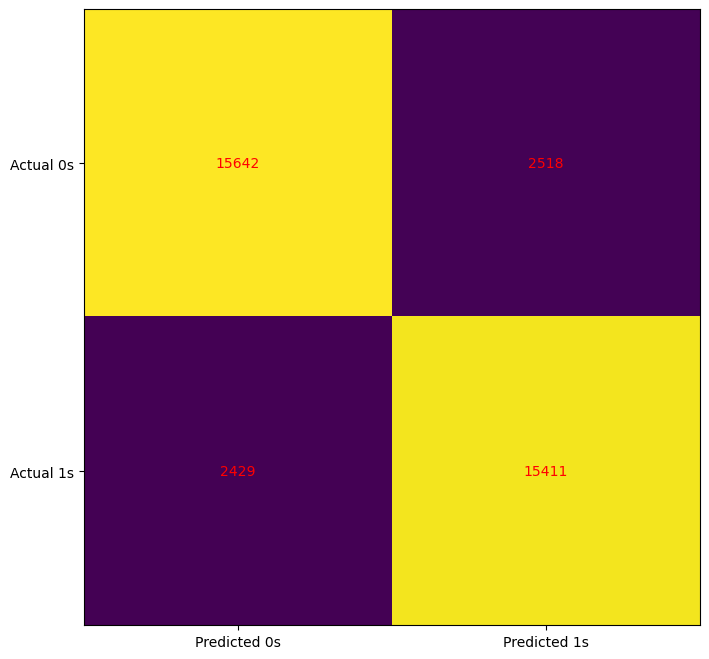

In [251]:
confusion_matrix_plot(y_test,y_predict)

In [238]:
y_test_list=y_test.tolist()
y_predict_list=y_predict.tolist()
test_list=test['Reviews_clean'].tolist()
rating_list=df['Ratings'].tolist()

In [256]:
import joblib
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(tfidfvect, final_model)

joblib.dump(pipe, "model.pkl")





['model.pkl']

In [254]:
%whos

Variable                   Type                    Data/Info
------------------------------------------------------------
AdaBoostClassifier         ABCMeta                 <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
Back                       AnsiBack                <colorama.ansi.AnsiBack o<...>ct at 0x00000158942F7D10>
CountVectorizer            type                    <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
DecisionTreeClassifier     ABCMeta                 <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
Fore                       AnsiFore                <colorama.ansi.AnsiFore o<...>ct at 0x00000158942F7890>
LemmaTokenizer             type                    <class '__main__.LemmaTokenizer'>
LogisticRegression         type                    <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
N                          int                     5000
Number                     int                     3
Pipeline                   ABCMeta        